In [64]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys  
sys.path.insert(0, '/home/HPC/camontan/turchetti_paper/')

from clustering_scripts import *

In [65]:
f = h5py.File(f"/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5", 'r')
f_stab = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_stability_stability.h5", "r")
f_lyap = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_tangent_map_tangent_stuff.h5", "r")

In [66]:
data = f_stab["stability"][:]
mask = np.log10(data)==8

In [67]:
ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

gt_thesh = find_threshold(np.log10(ground_truth_data[mask]))
ground_truth = np.log10(ground_truth_data) > gt_thesh

In [68]:
f.keys()

<KeysViewHDF5 ['10', '100', '1000', '10000', '100000', '1000000', '10000000', '100000000', '13', '138', '1389', '13894', '138949', '1389495', '13894954', '19', '193', '1930', '19306', '193069', '1930697', '19306977', '26', '268', '2682', '26826', '268269', '2682695', '26826957', '37', '372', '3727', '37275', '372759', '3727593', '37275937', '51', '517', '5179', '51794', '517947', '5179474', '51794746', '71', '719', '7196', '71968', '719685', '7196856', '71968567', 'initial']>

In [69]:
f['10000000'].keys()

<KeysViewHDF5 ['lyapunov_b_x', 'lyapunov_x']>

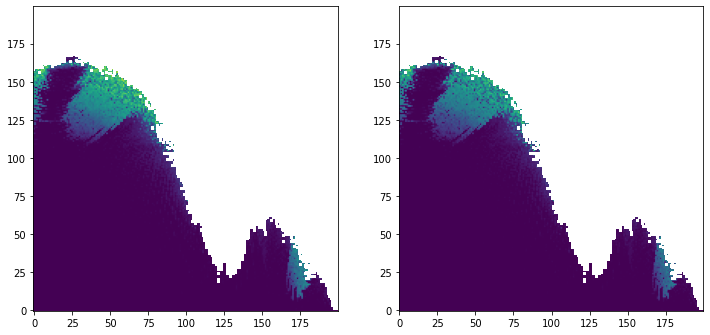

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

axs[0].imshow(f['1000000']['lyapunov_x'][:].reshape(200, 200), origin='lower')
axs[1].imshow(f['1000000']['lyapunov_b_x'][:].reshape(200, 200), origin='lower')


In [71]:
times = []
lyapunov_data = []

for key in f.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_data.append(f[key]['lyapunov_x'][:])

# sort times and lyapunov data
times, lyapunov_data = zip(*sorted(zip(times, lyapunov_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_data = np.array(lyapunov_data)

In [72]:
lyapunov_thresholds = []
lyapunov_post_data = []
lyapunov_guesses = []
lyapunov_scores = []
for t, data in zip(times, lyapunov_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_post_data.append(data)
    lyapunov_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_thresholds[-1])
    lyapunov_guesses.append(guess)
    lyapunov_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_27723/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data 

In [73]:
times = []
lyapunov_b_data = []

for key in f.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_b_data.append(f[key]['lyapunov_b_x'][:])

# sort times and lyapunov_b data
times, lyapunov_b_data = zip(*sorted(zip(times, lyapunov_b_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_b_data = np.array(lyapunov_b_data)

In [74]:
lyapunov_b_thresholds = []
lyapunov_b_post_data = []
lyapunov_b_guesses = []
lyapunov_b_scores = []
for t, data in zip(times, lyapunov_b_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_b_post_data.append(data)
    lyapunov_b_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_b_thresholds[-1])
    lyapunov_b_guesses.append(guess)
    lyapunov_b_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/

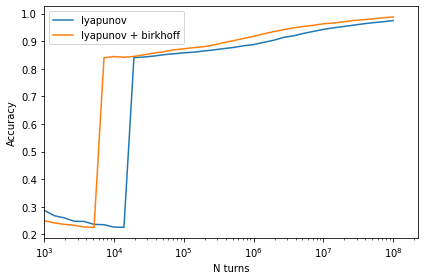

In [75]:
plt.plot(times, [l["accuracy"] for l in lyapunov_scores], label='lyapunov')
plt.plot(times, [l["accuracy"] for l in lyapunov_b_scores], label='lyapunov + birkhoff')
plt.xscale("log")
plt.legend()

plt.xlabel("N turns")
plt.ylabel("Accuracy")
plt.xlim(1e3)
plt.tight_layout()

In [57]:
lyapunov_b_scores[-1]

{'total': 15684,
 'true_positive': 1042,
 'true_negative': 12276,
 'false_positive': 0,
 'false_negative': 2366,
 'accuracy': 0.8491456261157868,
 'precision': 1.0,
 'recall': 0.3057511737089202,
 'f1': 0.468314606741573}

-17.725433391388307 -2.0972086217638166
(50, 50)


/tmp/ipykernel_27723/2391934502.py:4: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


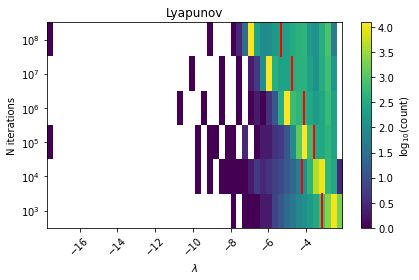

In [76]:
val_min, val_max = get_extents([l[mask] for l in lyapunov_post_data[14::7]], 10)
print(val_min, val_max)
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5])

for i, threshold in enumerate(lyapunov_thresholds[14::7]):
    plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

plt.xticks(rotation=45)
# set labels in y axis
plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("$\lambda$")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.title("Lyapunov")
plt.tight_layout()

-17.735895734702694 -2.0609229340758577
(50, 50)


/tmp/ipykernel_27723/1530245247.py:4: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


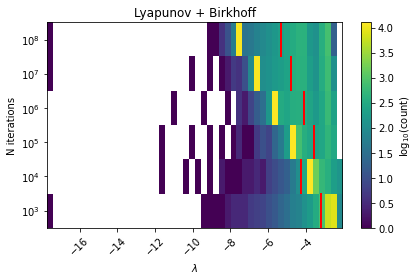

In [77]:
val_min, val_max = get_extents([l[mask] for l in lyapunov_b_post_data[14::7]], 10)
print(val_min, val_max)
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_b_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5])

for i, threshold in enumerate(lyapunov_thresholds[14::7]):
    plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

plt.xticks(rotation=45)
# set labels in y axis
plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("$\lambda$")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.title("Lyapunov + Birkhoff")
plt.tight_layout()

In [78]:
val_min, val_max = get_extents([np.log10(l[mask]) for l in lyapunov_post_data[14::7]], 10)
print(val_min, val_max)
tmp_data, bin_centers = compose_count_map([np.log10(l[mask]) for l in lyapunov_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5])

for i, threshold in enumerate(lyapunov_thresholds[14::7]):
    plt.plot(np.log10([threshold, threshold]), [i-0.475, i+0.48], color='r', linewidth=2)

plt.xticks(rotation=45)
# set labels in y axis
plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("$\lambda$")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.title("Lyapunov")
plt.tight_layout()

/tmp/ipykernel_27723/1819467226.py:1: RuntimeWarning: invalid value encountered in log10
  val_min, val_max = get_extents([np.log10(l[mask]) for l in lyapunov_post_data[14::7]], 10)
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:19: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data)
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:74: RuntimeWarning: All-NaN slice encountered
  val_min = np.nanmin([val_min, np.nanmin(d)])
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:74: RuntimeWarning: All-NaN axis encountered
  val_min = np.nanmin([val_min, np.nanmin(d)])
/home/HPC/camontan/turchetti_paper/clustering_scripts.py:75: RuntimeWarning: All-NaN slice encountered
  val_max = np.nanmax([val_max, np.nanmax(d)])
/home/HPC/camontan/turchetti_paper/clus

nan nan


ValueError: supplied range of [nan, nan] is not finite

/tmp/ipykernel_27723/1973988977.py:1: RuntimeWarning: invalid value encountered in log10
  val_min, val_max = get_extents([np.log10(l[mask]) for l in lyapunov_b_post_data[14::7]], 5)
/tmp/ipykernel_27723/1973988977.py:3: RuntimeWarning: invalid value encountered in log10
  tmp_data, bin_centers = compose_count_map([np.log10(l[mask]) for l in lyapunov_b_post_data], val_min, val_max, nbins=50, density=False)
/tmp/ipykernel_27723/1973988977.py:4: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


-5.315344797111489 -2.10354608712366
-5.315344797111489 -2.10354608712366
-6.82730061825024 -2.10354608712366
-8.891962516350896 -2.10354608712366
-9.722008174277775 -2.10354608712366
-9.722008174277775 -2.10354608712366
(47, 50)


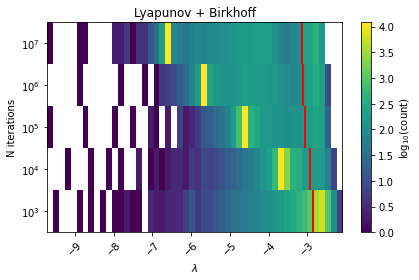

In [55]:
val_min, val_max = get_extents([np.log10(l[mask]) for l in lyapunov_b_post_data[14::7]], 5)
print(val_min, val_max)
tmp_data, bin_centers = compose_count_map([np.log10(l[mask]) for l in lyapunov_b_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5])

for i, threshold in enumerate(lyapunov_thresholds[14::7]):
    plt.plot(np.log10([threshold, threshold]), [i-0.475, i+0.48], color='r', linewidth=2)

plt.xticks(rotation=45)
# set labels in y axis
plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("$\lambda$")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.title("Lyapunov + Birkhoff")
plt.tight_layout()

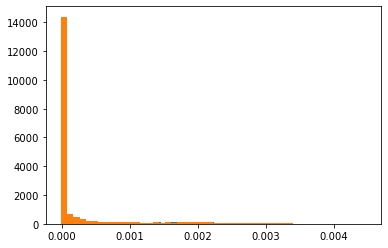

In [31]:
plt.hist(f['1000000']['lyapunov_x'][:], bins=50);
plt.hist(f['1000000']['lyapunov_b_x'][:], bins=50);

/tmp/ipykernel_24318/2464646838.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(f['37275937']['lyapunov_b_x'][:]), bins=100);


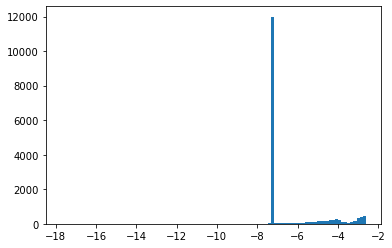

In [75]:
plt.hist(np.log10(f['37275937']['lyapunov_b_x'][:]), bins=100);

In [77]:
np.where(np.logical_and(f['37275937']['lyapunov_b_x'][:] > 1e-8, f['37275937']['lyapunov_b_x'][:] < 1e-7))

(array([    1,     2,     3, ..., 31825, 31826, 32419]),)

In [99]:
mask = np.logical_and(f['37275937']['lyapunov_b_x'][:] > 1e-8, f['37275937']['lyapunov_b_x'][:] < 1e-7)
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][mask][::10])
    data_2.append(f[key]['lyapunov_b_x'][mask][::10])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

/tmp/ipykernel_24318/2056407101.py:2: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_1[14:])
/tmp/ipykernel_24318/2056407101.py:8: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_2[14:])


Text(0.5, 1.0, 'Lyapunov exponent for stable particles')

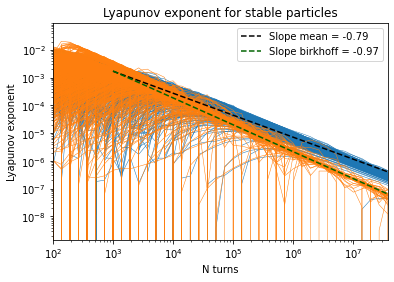

In [101]:
# fit a line to the log log data
tmp_data = np.log(data_1[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn = np.poly1d(fit)

tmp_data = np.log(data_2[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit_2 = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn_2 = np.poly1d(fit_2)

plt.plot(time, data_1, linewidth=0.5, c='C0')
plt.plot(time, data_2, linewidth=0.5, c='C1')
plt.plot(time[14:], np.exp(fit_fn(np.log(time[14:]))), "--", label='Slope mean = {:.2f}'.format(fit[0]), c="black")
plt.plot(time[14:], np.exp(fit_fn_2(np.log(time[14:]))), "--", label='Slope birkhoff = {:.2f}'.format(fit_2[0]), c="darkgreen")


plt.xscale("log")
plt.yscale("log")
plt.xlim(left=1e2, right=37275937)

plt.legend()
plt.xlabel("N turns")
plt.ylabel("Lyapunov exponent")
plt.title(f"Lyapunov exponent for stable particles")

/tmp/ipykernel_24318/2464646838.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(f['37275937']['lyapunov_b_x'][:]), bins=100);


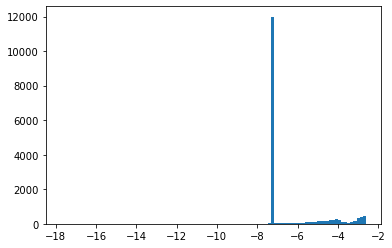

In [102]:
plt.hist(np.log10(f['37275937']['lyapunov_b_x'][:]), bins=100);

In [109]:
np.where(np.logical_and(f['37275937']['lyapunov_b_x'][:] > 5e-4, f['37275937']['lyapunov_b_x'][:] < 1e-3));

In [112]:
mask = np.logical_and(f['37275937']['lyapunov_b_x'][:] > 5e-4, f['37275937']['lyapunov_b_x'][:] < 1e-3)
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][mask][::10])
    data_2.append(f[key]['lyapunov_b_x'][mask][::10])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

/tmp/ipykernel_24318/4060366085.py:8: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_2[14:])


Text(0.5, 1.0, 'Lyapunov exponent for chaotic particles')

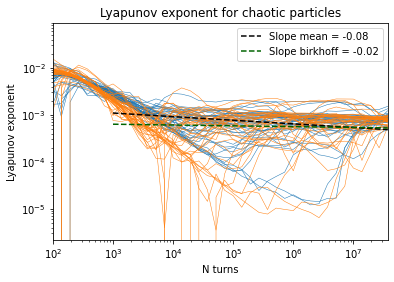

In [113]:
# fit a line to the log log data
tmp_data = np.log(data_1[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn = np.poly1d(fit)

tmp_data = np.log(data_2[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit_2 = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn_2 = np.poly1d(fit_2)

plt.plot(time, data_1, linewidth=0.5, c='C0')
plt.plot(time, data_2, linewidth=0.5, c='C1')
plt.plot(time[14:], np.exp(fit_fn(np.log(time[14:]))), "--", label='Slope mean = {:.2f}'.format(fit[0]), c="black")
plt.plot(time[14:], np.exp(fit_fn_2(np.log(time[14:]))), "--", label='Slope birkhoff = {:.2f}'.format(fit_2[0]), c="darkgreen")


plt.xscale("log")
plt.yscale("log")
plt.xlim(left=1e2, right=37275937)

plt.legend()
plt.xlabel("N turns")
plt.ylabel("Lyapunov exponent")
plt.title(f"Lyapunov exponent for chaotic particles")

In [125]:
mask = np.logical_and(f['37275937']['lyapunov_b_x'][:] > 5e-4, f['100000']['lyapunov_b_x'][:] * 100 < f['37275937']['lyapunov_b_x'][:])
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][mask][::1])
    data_2.append(f[key]['lyapunov_b_x'][mask][::1])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

/tmp/ipykernel_24318/4050786113.py:8: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_2[14:])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Lyapunov exponent for chaotic particles')

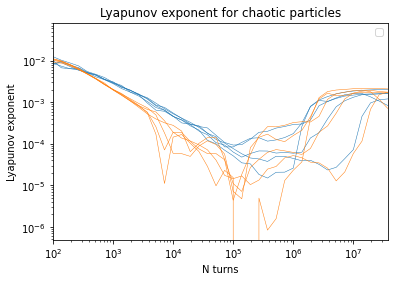

In [126]:
# fit a line to the log log data
tmp_data = np.log(data_1[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn = np.poly1d(fit)

tmp_data = np.log(data_2[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit_2 = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn_2 = np.poly1d(fit_2)

plt.plot(time, data_1, linewidth=0.5, c='C0')
plt.plot(time, data_2, linewidth=0.5, c='C1')
# plt.plot(time[14:], np.exp(fit_fn(np.log(time[14:]))), "--", label='Slope mean = {:.2f}'.format(fit[0]), c="black")
# plt.plot(time[14:], np.exp(fit_fn_2(np.log(time[14:]))), "--", label='Slope birkhoff = {:.2f}'.format(fit_2[0]), c="darkgreen")


plt.xscale("log")
plt.yscale("log")
plt.xlim(left=1e2, right=37275937)

plt.legend()
plt.xlabel("N turns")
plt.ylabel("Lyapunov exponent")
plt.title(f"Lyapunov exponent for chaotic particles")

In [121]:
mask = np.logical_and(f['37275937']['lyapunov_b_x'][:] > 5e-4, f['100000']['lyapunov_b_x'][:] * 50 < f['37275937']['lyapunov_b_x'][:])
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][mask][::1])
    data_2.append(f[key]['lyapunov_b_x'][mask][::1])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

/tmp/ipykernel_24318/4050786113.py:8: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_2[14:])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Lyapunov exponent for chaotic particles')

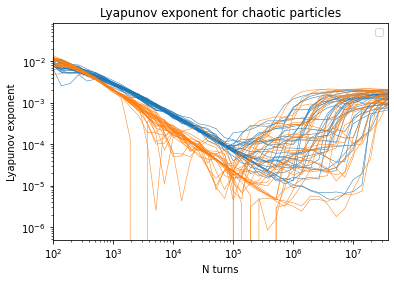

In [123]:
# fit a line to the log log data
tmp_data = np.log(data_1[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn = np.poly1d(fit)

tmp_data = np.log(data_2[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit_2 = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn_2 = np.poly1d(fit_2)

plt.plot(time, data_1, linewidth=0.5, c='C0')
plt.plot(time, data_2, linewidth=0.5, c='C1')
# plt.plot(time[14:], np.exp(fit_fn(np.log(time[14:]))), "--", label='Slope mean = {:.2f}'.format(fit[0]), c="black")
# plt.plot(time[14:], np.exp(fit_fn_2(np.log(time[14:]))), "--", label='Slope birkhoff = {:.2f}'.format(fit_2[0]), c="darkgreen")


plt.xscale("log")
plt.yscale("log")
plt.xlim(left=1e2, right=37275937)

plt.legend()
plt.xlabel("N turns")
plt.ylabel("Lyapunov exponent")
plt.title(f"Lyapunov exponent for chaotic particles")

In [96]:
tmp_data

array([ -6.82007567,  -6.74204689,  -6.95751168,  -6.85218848,
        -6.98633991,  -7.06659464,  -7.14690673,  -7.45152465,
        -7.48798485,  -7.65451074,  -7.84111177,  -8.06279543,
        -8.27892624,  -8.53540954,  -8.76896152,  -9.04954647,
        -9.29318513,  -9.54744572,  -9.80760119, -10.12497394,
       -10.37734306, -10.64730276, -10.91969596, -11.20136502,
       -11.47802589, -11.76901883, -12.05412076, -12.3396781 ,
       -12.63333174, -12.92363027, -13.21806797, -13.51109824,
       -13.8059338 , -14.1352421 , -14.42150668, -14.71741358,
       -15.0138711 ])

In [34]:
idx = np.nanargmin(f['37275937']['lyapunov_b_x'][:])
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][idx])
    data_2.append(f[key]['lyapunov_b_x'][idx])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

Text(0.5, 1.0, 'Lyapunov exponent for the most stable particle at 37275937 turns')

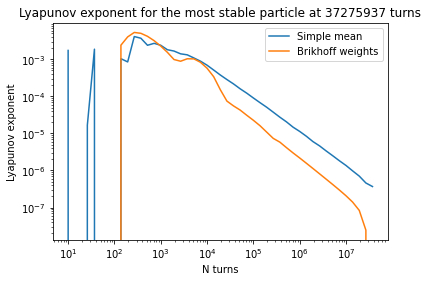

In [35]:
plt.plot(time, data_1, label='Simple mean')
plt.plot(time, data_2, label='Brikhoff weights')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("N turns")
plt.ylabel("Lyapunov exponent")
plt.title(f"Lyapunov exponent for the most stable particle at {37275937} turns")

In [38]:
time[14]

1000

[-2.62017215 -2.74002358 -2.77585485 -2.85101809 -2.87769881 -2.96201199
 -3.04905983 -3.15817038 -3.28903353 -3.42267183 -3.54574826 -3.66381785
 -3.79517743 -3.91338882 -4.04329361 -4.16947413 -4.2917966  -4.42620848
 -4.56152994 -4.68772765 -4.83141771 -4.94626643 -5.07532307 -5.22023107
 -5.33616658 -5.47306698 -5.60368438 -5.73832528 -5.86554488 -6.01145817
 -6.15220631 -6.33787025 -6.4338153 ]
[ 2.5929143   2.13256853  1.54392528  1.11208365  0.67344164  0.31021268
 -0.03446845 -0.36416426 -0.652566   -0.93353789 -1.19169829 -1.43484289
 -1.66572203 -1.88517939 -2.09394432 -2.29219601 -2.4818409  -2.66347078
 -2.83768158 -3.00504044 -3.16603535 -3.32124282 -3.47091735 -3.61555574
 -3.7554494  -3.89089926 -4.02218068 -4.14954093 -4.27320948 -4.3933896
 -4.5102781  -4.62404984 -4.7348659  -4.84287582 -4.94821852 -5.05102288
 -5.1514077  -5.24948472 -5.34535761 -5.43912323 -5.53087221 -5.62068949
 -5.70865475 -5.79484276 -5.879324   -5.96216471 -6.04342741]


array([ 0.26395815, -9.82320235])

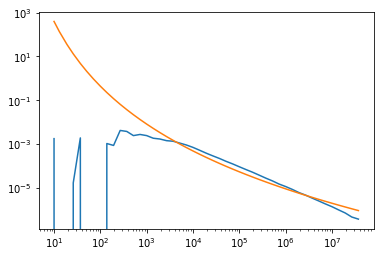

In [64]:
# fit the law (x / 10**a)**b = y to the data

from scipy.optimize import curve_fit

def func(x, a, b):
    return np.log10((x / 10**a)**b)

popt, pcov = curve_fit(func, np.log10(time[14:]), np.log10(data_1[14:]), p0=(1, -1))


plt.plot(time, data_1, label='Brikhoff weights')
plt.plot(time, np.power(10, func(np.log10(time), *popt)), label='Fit')
plt.xscale("log")
plt.yscale("log")
print(np.log10(data_1[14:]))
print(func(np.log10(time), *popt))
popt

/tmp/ipykernel_24318/937098653.py:5: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_2[8:])


Text(0.5, 1.0, 'Lyapunov exponent for the most stable particle at max turns')

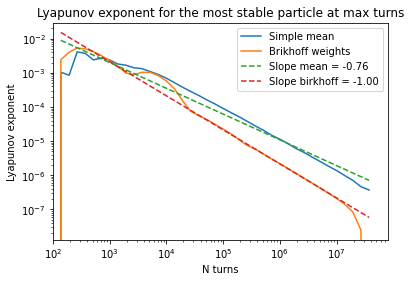

In [71]:
# fit a line to the log log data
fit = np.polyfit(np.log(time[8:]), np.log(data_1[8:]), 1)
fit_fn = np.poly1d(fit)

tmp_data = np.log(data_2[8:])
mask = ~np.isnan(tmp_data)
fit_2 = np.polyfit(np.log(time[8:][mask]), np.log(data_2[8:][mask]), 1)
fit_fn_2 = np.poly1d(fit_2)

plt.plot(time, data_1, label='Simple mean')
plt.plot(time, data_2, label='Brikhoff weights')
plt.plot(time[8:], np.exp(fit_fn(np.log(time[8:]))), "--", label='Slope mean = {:.2f}'.format(fit[0]))
plt.plot(time[8:], np.exp(fit_fn_2(np.log(time[8:]))), "--", label='Slope birkhoff = {:.2f}'.format(fit_2[0]))

# plt.plot(time, 1/(0.86*time))

plt.xscale("log")
plt.yscale("log")
plt.xlim(left=1e2)

plt.legend()
plt.xlabel("N turns")
plt.ylabel("Lyapunov exponent")
plt.title(f"Lyapunov exponent for the most stable particle at max turns")

In [49]:
fit_2

array([-1.07431045,  1.75210376])

In [32]:
idx = np.nanargmax(f['37275937']['lyapunov_b_x'][:])
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][idx])
    data_2.append(f[key]['lyapunov_b_x'][idx])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

Text(0.5, 1.0, 'Lyapunov exponent for the most chaotic particle at 37275937 turns')

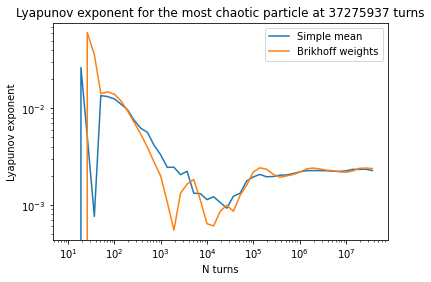

In [33]:
plt.plot(time, data_1, label='Simple mean')
plt.plot(time, data_2, label='Brikhoff weights')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("N turns")
plt.ylabel("Lyapunov exponent")
plt.title(f"Lyapunov exponent for the most chaotic particle at {37275937} turns")

In [9]:
f['1000000']['lyapunov_b_x'][np.nanargmin(f['1000000']['lyapunov_b_x'][:])]

-5.44311586496637e-06